In [ ]:

pip install pandas_datareader

In [ ]:
pip install jdatetime

In [ ]:
 pip install persiantools

In [1]:
import glob
import pandas as pd
from persiantools.jdatetime import JalaliDate
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web

In [3]:
list_of_dfs=[]
for file_name in glob.iglob(r'./data/*.csv'):
    list_of_dfs.append(pd.read_csv(file_name))
len(list_of_dfs)
portfolio = list_of_dfs[0].rename(columns={'<CLOSE>': '0'})
portfolio = portfolio['0']


In [4]:
random_list = [random.randrange(1, 30, 1) for i in range(9)]
weights = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0.1])

random_list

[23, 12, 29, 20, 19, 27, 2, 23, 11]

In [5]:

for item in random_list:
    portfolio_new = list_of_dfs[item].rename(columns={'<CLOSE>': f'{item}'})
    daily_return = portfolio_new[f'{item}']
    portfolio = pd.concat([portfolio,daily_return], axis=1)


In [6]:
return_pct_change = portfolio.pct_change()
cov_matrix_d = return_pct_change.cov()
weights = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
port_variance = np.dot(weights.T, np.dot(cov_matrix_d, weights))

In [9]:
port_variance

0.00014739206988554376

In [10]:
variance_list = []
for i in range(1, 1000):
    portfolio = list_of_dfs[0].rename(columns={'<CLOSE>': '0'})
    portfolio = portfolio['0']
    random_list = [random.randrange(1, 30, 1) for i in range(9)]
    weights = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0.1])
    for item in random_list:
        portfolio_new = list_of_dfs[item].rename(columns={'<CLOSE>': f'{item}'})
        daily_return = portfolio_new[f'{item}']
        portfolio = pd.concat([portfolio,daily_return], axis=1)
    return_pct_change = portfolio.pct_change()
    cov_matrix_d = return_pct_change.cov()
    port_variance = np.dot(weights.T, np.dot(cov_matrix_d, weights))
    variance_list.append(port_variance)
    

In [12]:
average = sum(variance_list) / len(variance_list)
average

0.0006810316447658099

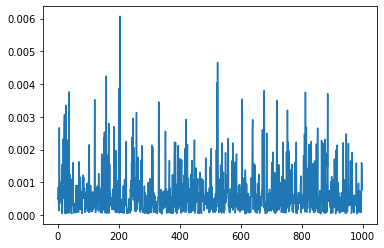

In [13]:
plt.plot(variance_list)